# Multiclass classification

<strong>Abstract</strong>  
In this notebook, neural networks will be build for classifying topics of Reuters' newswires. This is a <strong>multiclass classification</strong> example.

<strong>Reference</strong>  
See pages 78-84 of "<strong>Deep Learning with Python</strong>" by Francois Chollet (2018). 

<strong>Summary (page 84)</strong>  
- For a multiclass classification problem, the final activation function should be softmax, which returns a value between 0 and 1.
- An appropreate loss function is categorical_crossentropy.
- If you want to classify data with N labels, try to avoid using layers whose nodes are less than N. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Loading the Reuters dataset

In [31]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print("train_data shape: {}".format(train_data.shape))
print("train_labels shape: {}".format(train_labels.shape))
print("test_data shape: {}".format(test_data.shape))
print("test_labels shape: {}".format(test_labels.shape))

train_data shape: (8982,)
train_labels shape: (8982,)
test_data shape: (2246,)
test_labels shape: (2246,)


In [32]:
print("the first 5 train_data: \n{}".format(train_data[:5]))
print("\nthe first 5 train_labes: \n{}".format(train_labels[:5]))

the first 5 train_data: 
[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511,

Let us perfom data preprocessing:
- 0 padding for training and test data so that they have the same length (10000).
- one-hot encoding for labels.

In [33]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i , sequence in enumerate(sequences):
    results[i,sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("length of the first training data: ", len(x_train[0]))
print("length of the second training data: ", len(x_train[1]))
print("length of the third training data: ", len(x_train[2]))

print("length of the first test data: ", len(x_test[0]))
print("length of the second test data: ", len(x_test[1]))
print("length of the third test data: ", len(x_test[2]))



one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print("\nThe first 3 train_labels:")
print(one_hot_train_labels[:3])

print("\nThere are %d classes."%len(one_hot_train_labels[0]))

length of the first training data:  10000
length of the second training data:  10000
length of the third training data:  10000
length of the first test data:  10000
length of the second test data:  10000
length of the third test data:  10000

The first 3 train_labels:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

There are 46 classes.


A validation set will be created from the original training dataset.

In [39]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

print("x_val shape: ",x_val.shape)
print("partial_x_train", partial_x_train.shape)
print("y_val shape: ",y_val.shape)
print("partial_y_train", partial_y_train.shape)

x_val shape:  (1000, 10000)
partial_x_train (7982, 10000)
y_val shape:  (1000, 46)
partial_y_train (7982, 46)


## Neural network 1

In [40]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                          metrics=['accuracy'])

history=model.fit(partial_x_train,
                           partial_y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_val, y_val)) 

Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 299us/step - loss: 2.6662 - acc: 0.4188 - val_loss: 1.8151 - val_acc: 0.6240
Epoch 2/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.4926 - acc: 0.6857 - val_loss: 1.3316 - val_acc: 0.6910
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0885 - acc: 0.7671 - val_loss: 1.1382 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.8415 - acc: 0.8215 - val_loss: 1.0228 - val_acc: 0.7910
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.6684 - acc: 0.8638 - val_loss: 0.9490 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.5253 - acc: 0.8941 - val_loss: 0.9336 - val_acc: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.4277 - acc: 0.9113 - val_loss: 0.8752 - val_acc: 0.

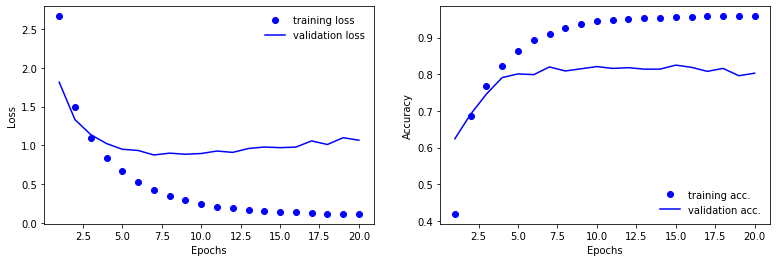

In [43]:
def visualize_history(history):

  history_dict = history.history
  loss_values=history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values= history_dict['acc']
  val_acc_values= history_dict['val_acc']

  epochs = range(1,len(loss_values)+1)

  plt.figure(figsize=(13,4))
  plt.subplot(121)
  plt.plot(epochs, loss_values, 'bo', label='training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(frameon=False)

  plt.subplot(122)
  plt.plot(epochs, acc_values, 'bo', label='training acc.')
  plt.plot(epochs, val_acc_values, 'b', label = 'validation acc.')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(frameon=False)

  plt.show()

visualize_history(history)

In order to avoid overfitting, a model will be trained for 4 epochs.

In [44]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                          metrics=['accuracy'])

history=model.fit(partial_x_train,
                           partial_y_train,
                           epochs=4,
                           batch_size=512,
                           validation_data=(x_val, y_val)) 

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 1s 187us/step - loss: 2.5975 - acc: 0.4813 - val_loss: 1.7412 - val_acc: 0.6150
Epoch 2/4
7982/7982 [==============================] - 1s 131us/step - loss: 1.4385 - acc: 0.6931 - val_loss: 1.3443 - val_acc: 0.7000
Epoch 3/4
7982/7982 [==============================] - 1s 131us/step - loss: 1.0767 - acc: 0.7699 - val_loss: 1.1546 - val_acc: 0.7480
Epoch 4/4
7982/7982 [==============================] - 1s 131us/step - loss: 0.8499 - acc: 0.8213 - val_loss: 1.0684 - val_acc: 0.7750


In [45]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 86us/step


[1.1314735325552583, 0.7502226180140715]

It is possible to get a probability distribution.

predictions shape:  (2246, 46)
the first prediction:  [3.0325892e-04 4.5530135e-03 3.4539826e-04 7.0059621e-01 2.1744494e-01
 3.1774596e-04 3.1271685e-04 6.1887095e-04 1.5340243e-02 1.8954208e-03
 3.8776370e-03 4.5942036e-03 5.6942611e-04 6.3122786e-03 4.2012444e-04
 7.7060504e-05 9.4556995e-03 1.8336707e-03 5.1925466e-03 6.0380050e-03
 8.1320042e-03 3.1287093e-03 5.0499406e-05 5.2658736e-04 1.0214527e-03
 1.6122588e-03 4.0149505e-04 5.2320123e-05 4.8988219e-04 2.7684524e-04
 2.8361971e-04 1.5378413e-04 1.6635944e-04 7.5551070e-05 4.5213895e-04
 5.0527589e-05 9.9081872e-04 1.1403585e-04 4.2570272e-04 3.8500485e-04
 4.4946489e-04 2.6584594e-04 9.2118855e-05 2.1172703e-04 3.5143694e-05
 5.7671034e-05]
sum  = 1.000 (expected to be 1)
maximum at index 3
the first element in test_labels: 3


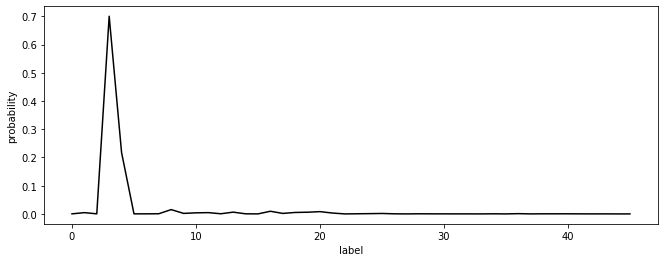

In [62]:
predictions = model.predict(x_test)

print("predictions shape: ", predictions.shape)
print("the first prediction: ", predictions[0])
print("sum  = %0.3f (expected to be 1)"%np.sum(predictions[0]))
print("maximum at index", np.argmax(predictions[0]))
print("the first element in test_labels:", test_labels[0])

plt.figure(figsize=(11,4))
plt.plot(predictions[0],'k')
plt.xlabel('label')
plt.ylabel('probability')
plt.show()

## The importance of having sufficiently large intermediate layers

Since the output laer is 46 dimensions, you should avoid intermediate layers whose nodes are less than 46. In the next cell, the number of nodes is intentionally set to be less than 46.

In [63]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                          metrics=['accuracy'])

history=model.fit(partial_x_train,
                           partial_y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_val, y_val)) 

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 329us/step - loss: 3.4815 - acc: 0.1175 - val_loss: 3.1473 - val_acc: 0.3790
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 2.8904 - acc: 0.4078 - val_loss: 2.6699 - val_acc: 0.4090
Epoch 3/20
7982/7982 [==============================] - 1s 134us/step - loss: 2.4296 - acc: 0.4162 - val_loss: 2.3154 - val_acc: 0.4130
Epoch 4/20
7982/7982 [==============================] - 1s 131us/step - loss: 2.0929 - acc: 0.4206 - val_loss: 2.0692 - val_acc: 0.4160
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.8530 - acc: 0.5219 - val_loss: 1.8860 - val_acc: 0.5840
Epoch 6/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.6622 - acc: 0.6347 - val_loss: 1.7660 - val_acc: 0.6020
Epoch 7/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.5089 - acc: 0.6584 - val_loss: 1.6436 - val_acc: 0.6360


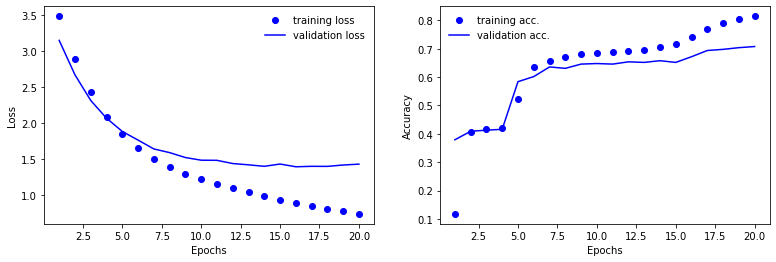

In [64]:
visualize_history(history)